<ipython-input-1-1fd415650fa0>:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((xc, yc), R, color='blue', alpha=0.2, edgecolor='blue', linestyle='--')


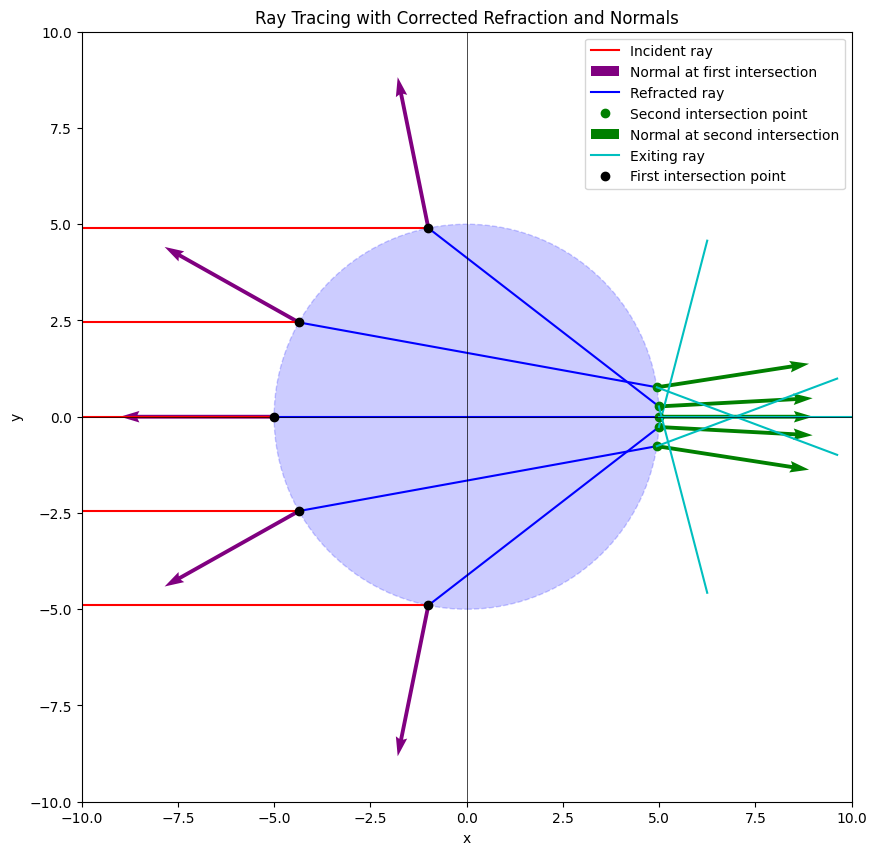

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Circle parameters
R = 5  # radius of the circle
xc, yc = 0, 0  # center of the circle

# Refraction indices
n_outside = 1.0  # refractive index outside the circle
n_inside = 1.5   # refractive index inside the circle

# Function to find the first intersection point
def find_intersection(y_entry):
    alpha_prime = np.arcsin((y_entry - yc) / R)
    alpha = np.pi - alpha_prime
    x_intersect = R * np.cos(alpha) + xc
    y_intersect = R * np.sin(alpha) + yc
    return x_intersect, y_intersect

# Function to compute refracted direction based on the approach in the de Greve document
def refract_ray(I, N, n1, n2):
    eta = n1 / n2
    cos_theta_i = -np.dot(I, N)
    sin2_theta_t = eta**2 * (1 - cos_theta_i**2)

    if sin2_theta_t > 1.0:
        return None  # Total internal reflection

    cos_theta_t = np.sqrt(1 - sin2_theta_t)
    T = eta * I + (eta * cos_theta_i - cos_theta_t) * N
    return T / np.linalg.norm(T)  # Return unit vector for refracted ray

# Function to find the second intersection of the refracted ray with the circle
def find_second_intersection(x_intersect, y_intersect, dx, dy):
    A = dx**2 + dy**2
    B = 2 * (dx * (x_intersect - xc) + dy * (y_intersect - yc))
    C = (x_intersect - xc)**2 + (y_intersect - yc)**2 - R**2

    discriminant = B**2 - 4 * A * C
    if discriminant < 0:
        return None, None
    t1 = (-B + np.sqrt(discriminant)) / (2 * A)
    t2 = (-B - np.sqrt(discriminant)) / (2 * A)
    t = max(t1, t2)

    x_second = x_intersect + t * dx
    y_second = y_intersect + t * dy
    return x_second, y_second

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((xc, yc), R, color='blue', alpha=0.2, edgecolor='blue', linestyle='--')
ax.add_patch(circle)

# Range of initial y-coordinates for rays that intersect the circle
epsilon = 0.1
y_values = np.linspace(-R + epsilon, R - epsilon, 5)

# Plot each ray
for y_entry in y_values:
    x_start = -10  # starting x-coordinate for the incoming ray
    x_intersect, y_intersect = find_intersection(y_entry)

    # Plot the incoming ray
    plt.plot([x_start, x_intersect], [y_entry, y_intersect], 'r-', label="Incident ray" if y_entry == y_values[0] else "")

    # Incident ray vector
    I = np.array([1, 0])  # Horizontal ray pointing rightward

    # Normal at the first intersection point
    N = np.array([(x_intersect - xc) / R, (y_intersect - yc) / R])
    plt.quiver(x_intersect, y_intersect, N[0], N[1], color='purple', scale=5, width=0.005, label="Normal at first intersection" if y_entry == y_values[0] else "")

    # Refracted ray inside the circle
    T = refract_ray(I, N, n_outside, n_inside)
    if T is not None:
        dx, dy = T
        x_second, y_second = find_second_intersection(x_intersect, y_intersect, dx, dy)

        if x_second is not None and y_second is not None:
            # Extend the first refracted ray to the second intersection point
            plt.plot([x_intersect, x_second], [y_intersect, y_second], 'b-', label="Refracted ray" if y_entry == y_values[0] else "")

            # Mark the second intersection point
            plt.plot(x_second, y_second, 'go', label="Second intersection point" if y_entry == y_values[0] else "")

            # Normal at the second intersection point
            N_second = np.array([(x_second - xc) / R, (y_second - yc) / R])
            plt.quiver(x_second, y_second, N_second[0], N_second[1], color='green', scale=5, width=0.005, label="Normal at second intersection" if y_entry == y_values[0] else "")

            # Exiting ray direction after the second refraction
            T_exit = refract_ray(T, -N_second, n_inside, n_outside)

            if T_exit is not None:
                dx_exit, dy_exit = T_exit
                # Plot the exiting ray, extending it to the outside of the circle
                x_exit_end = x_second + dx_exit * 5  # lengthened for visualization outside the circle
                y_exit_end = y_second + dy_exit * 5
                plt.plot([x_second, x_exit_end], [y_second, y_exit_end], 'c-', label="Exiting ray" if y_entry == y_values[0] else "")

    # Mark the first intersection point
    plt.plot(x_intersect, y_intersect, 'ko', label="First intersection point" if y_entry == y_values[0] else "")

# Circle and plot details
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Ray Tracing with Corrected Refraction and Normals")
plt.show()
